# 3D sturcture
In this case we use `SLAT` to rebuild 3D sturcture of mouse embryo

In [1]:
import os
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

from scSLAT.model import run_SLAT_multi
from scSLAT.viz import build_3D

In [2]:
sc.set_figure_params(dpi=150, dpi_save=150)

In [3]:
file_path = '../../data/stereo_seq/counts/E15.5/'
file_list = [file for file in Path(file_path).iterdir() if 'filter' not in str(file)]
file_list

[PosixPath('../../data/stereo_seq/counts/E15.5/count_E15.5_E1S3.MOSTA.h5ad'),
 PosixPath('../../data/stereo_seq/counts/E15.5/count_E15.5_E1S4.MOSTA.h5ad'),
 PosixPath('../../data/stereo_seq/counts/E15.5/count_E15.5_E1S2.MOSTA.h5ad'),
 PosixPath('../../data/stereo_seq/counts/E15.5/count_E15.5_E1S1.MOSTA.h5ad')]

In [4]:
adata1,adata2,adata3,adata4 = Parallel(n_jobs=len(file_list)+1)\
    (delayed(sc.read_h5ad)(file) for file in itemgetter(*[3,1,0,2])(file_list))

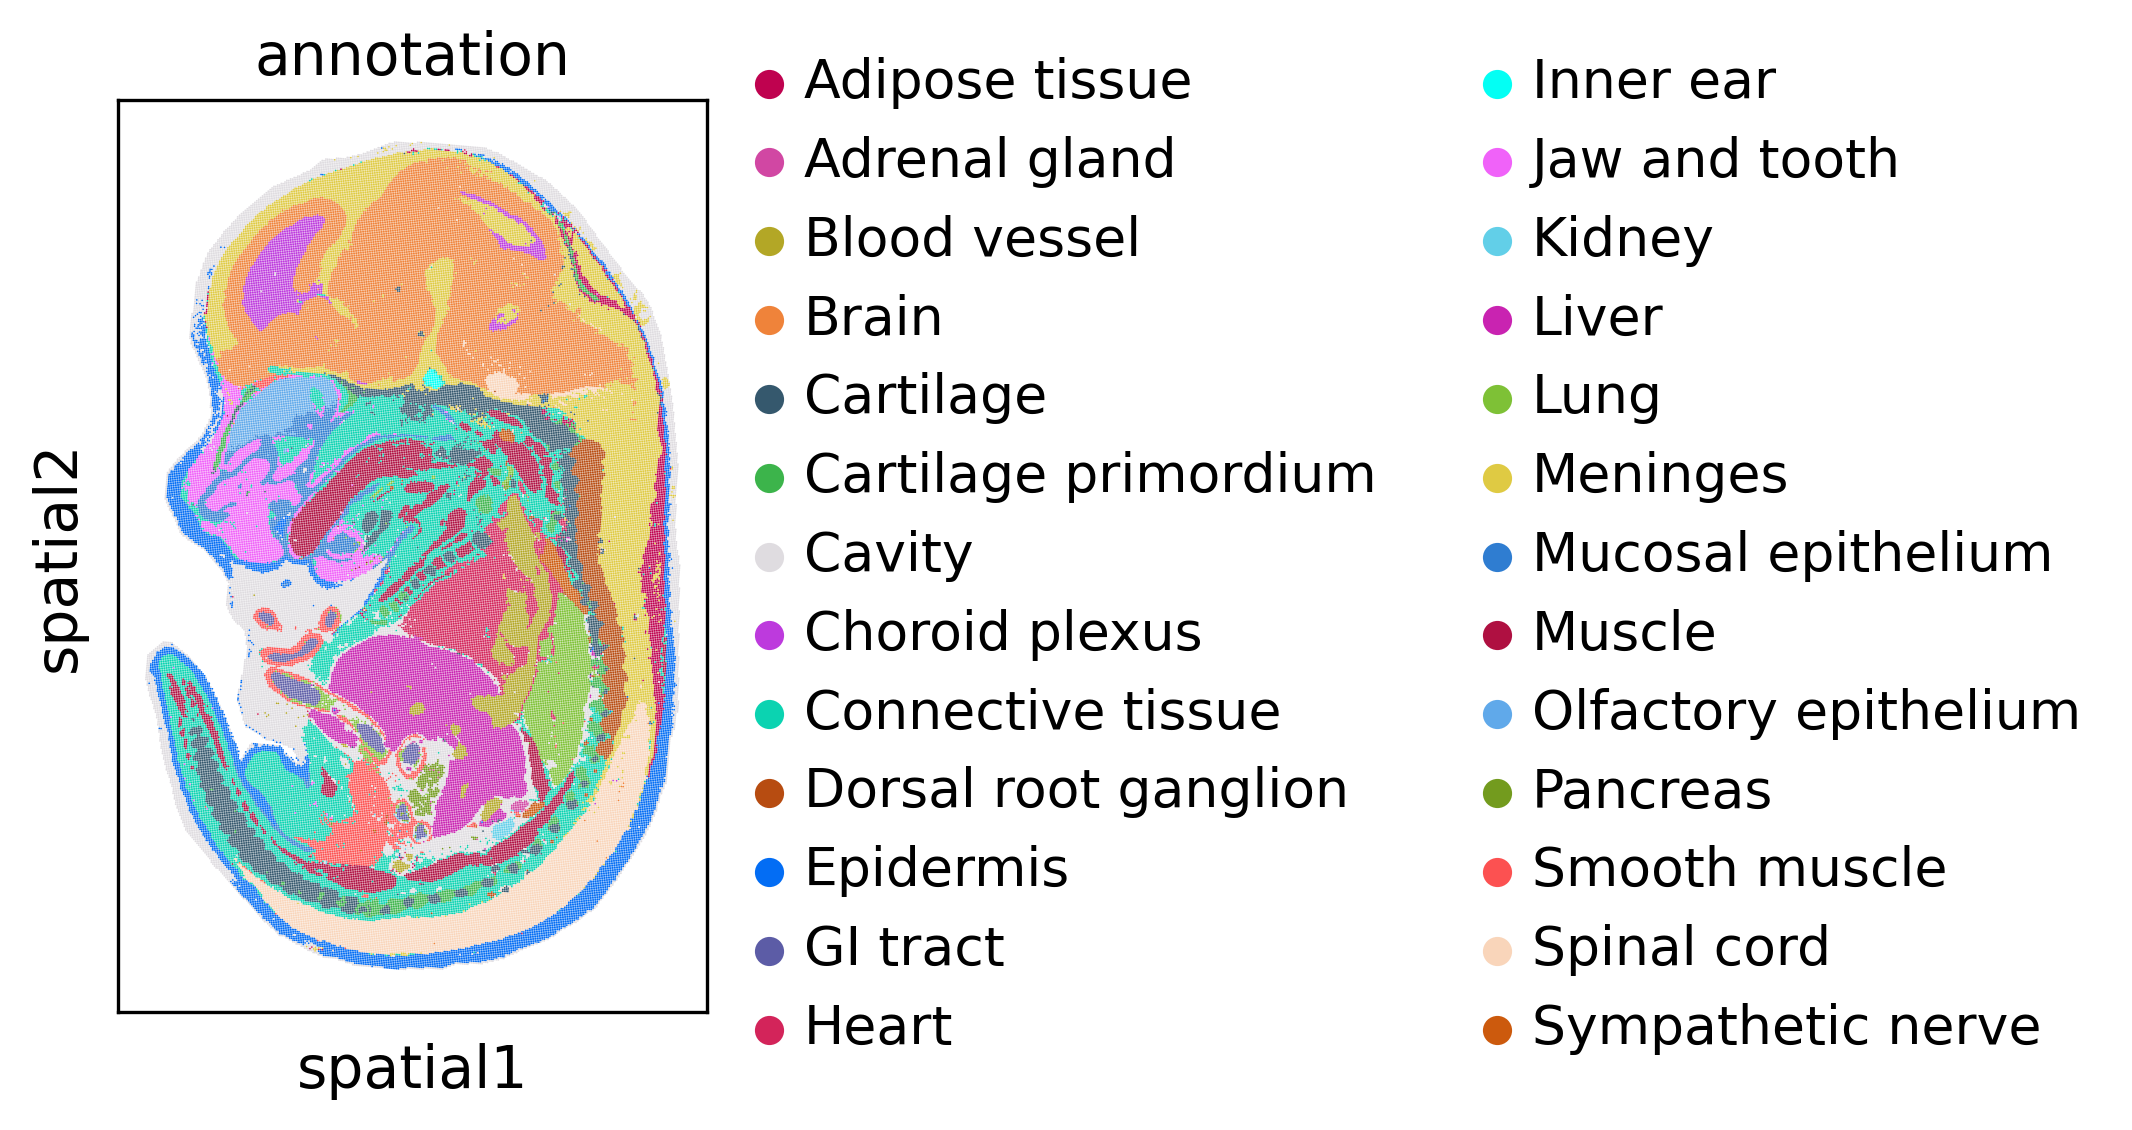

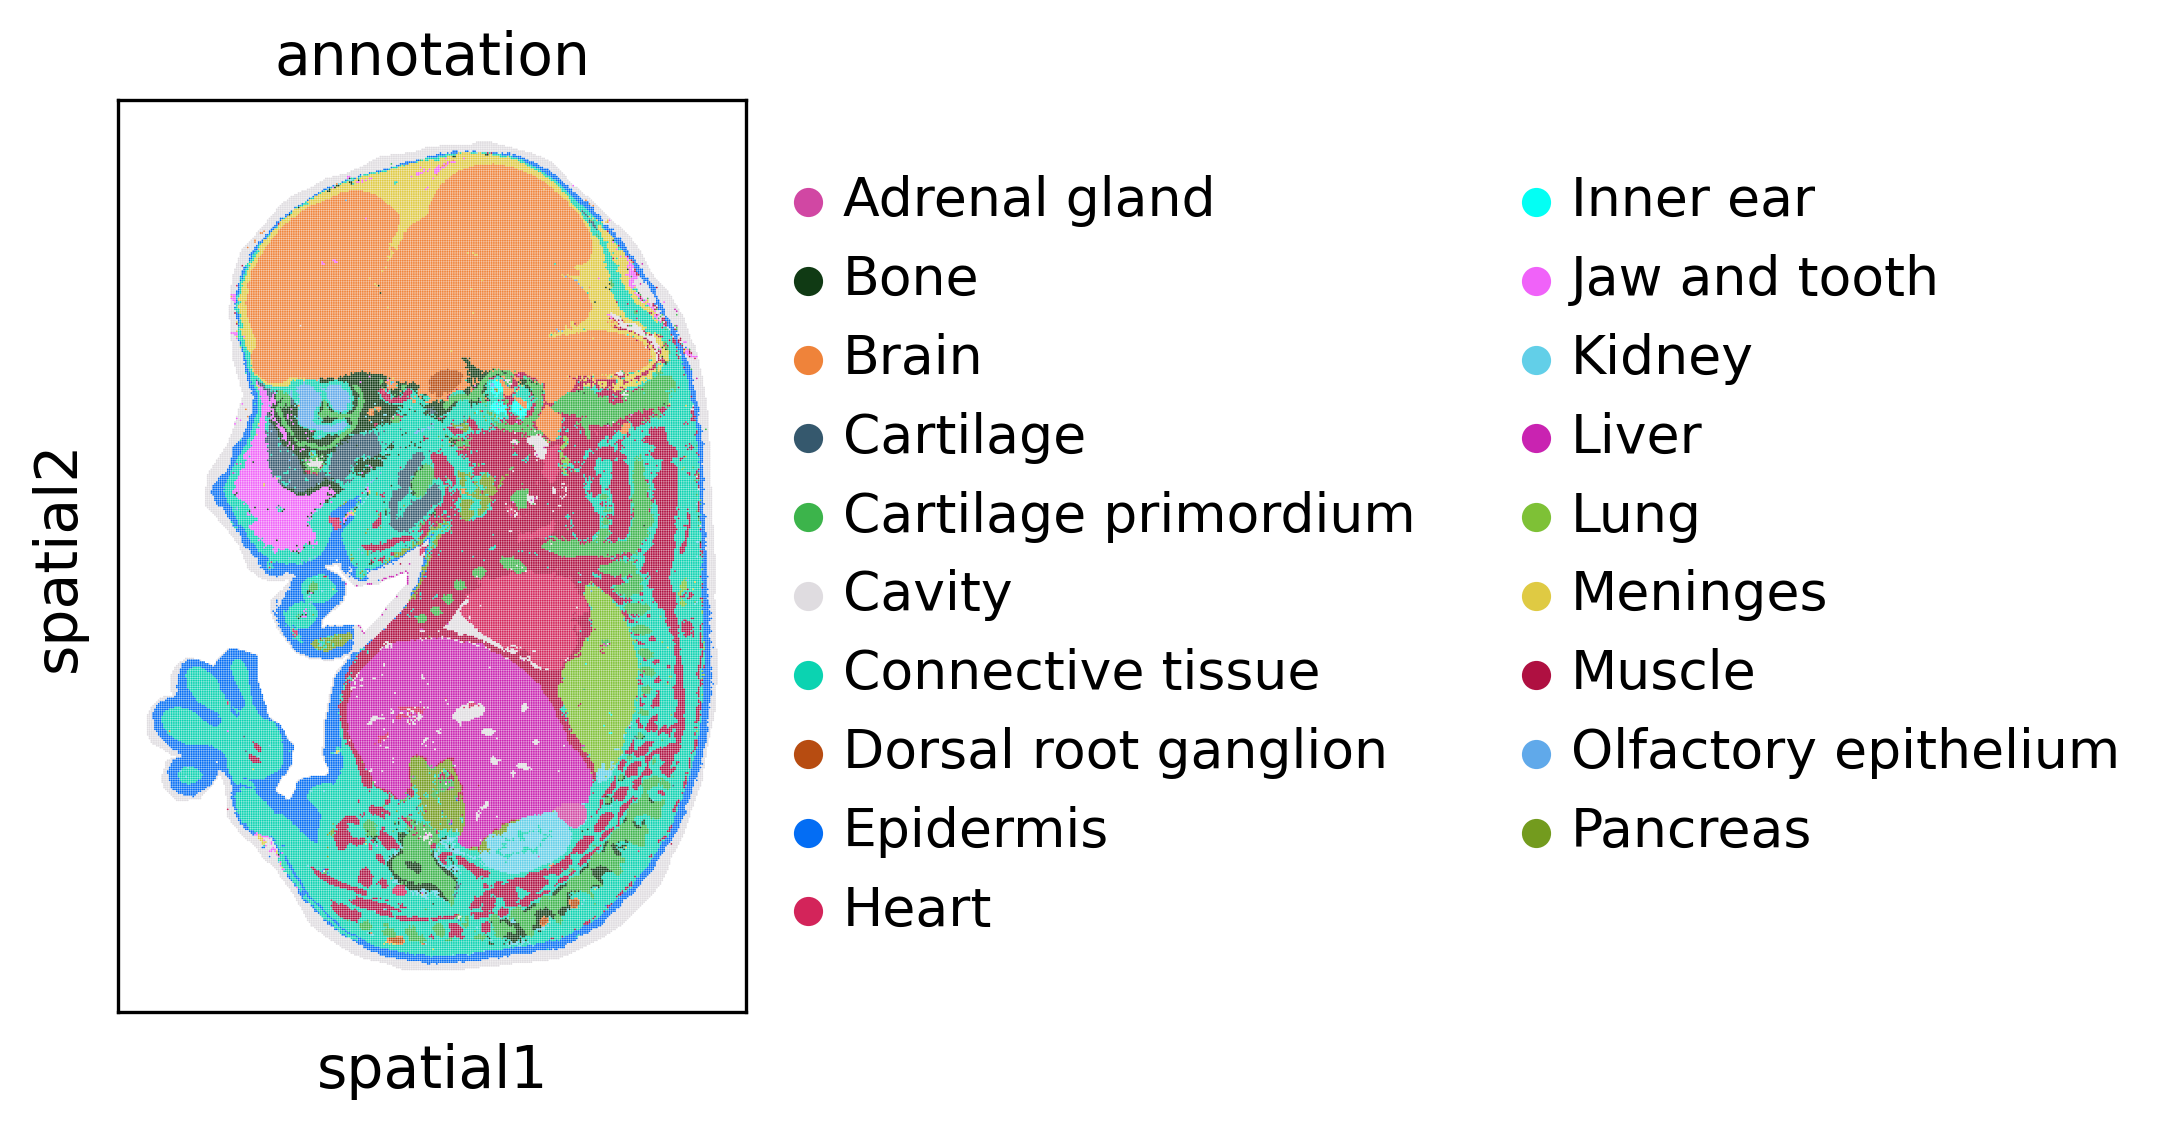

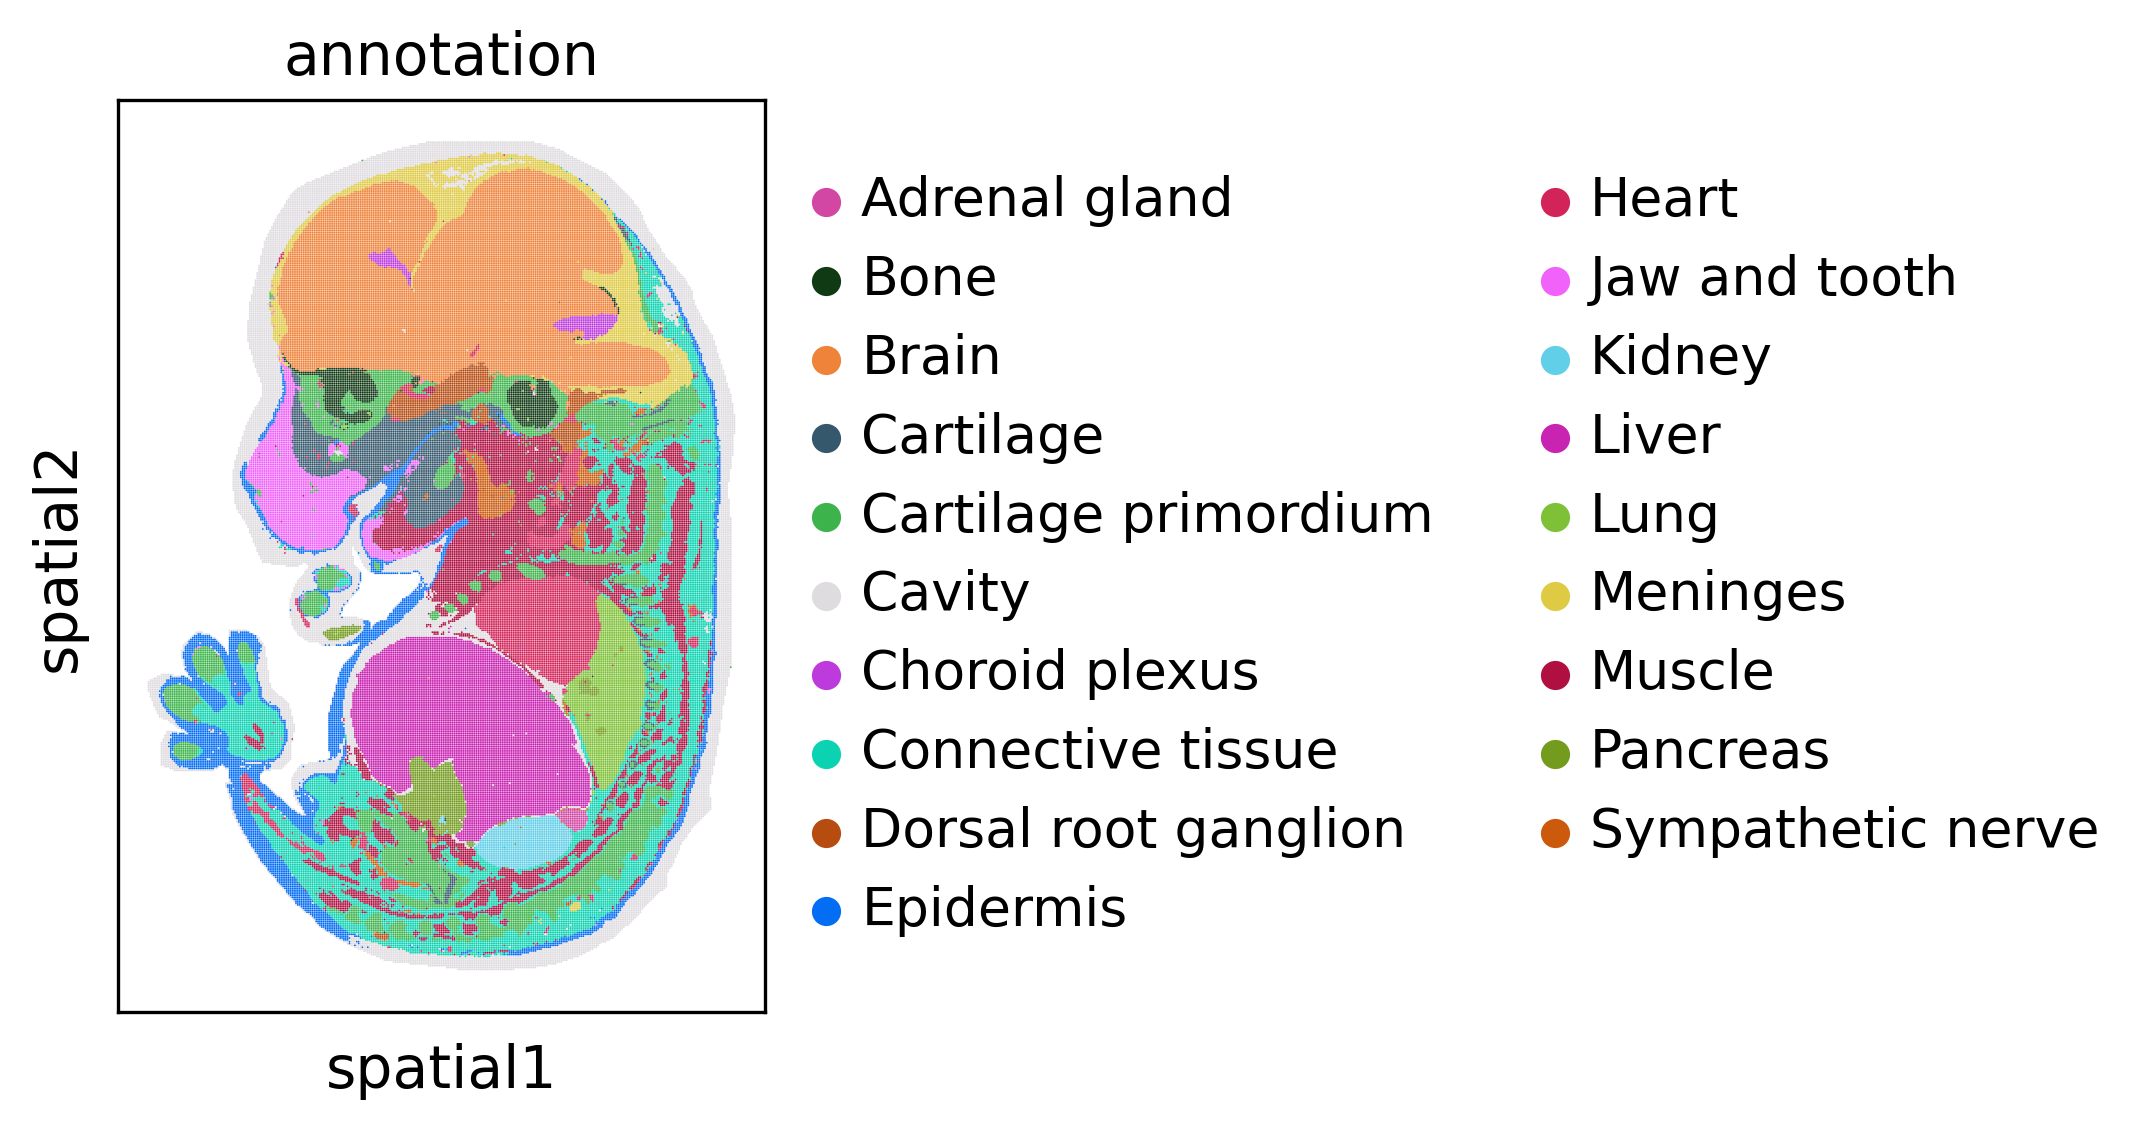

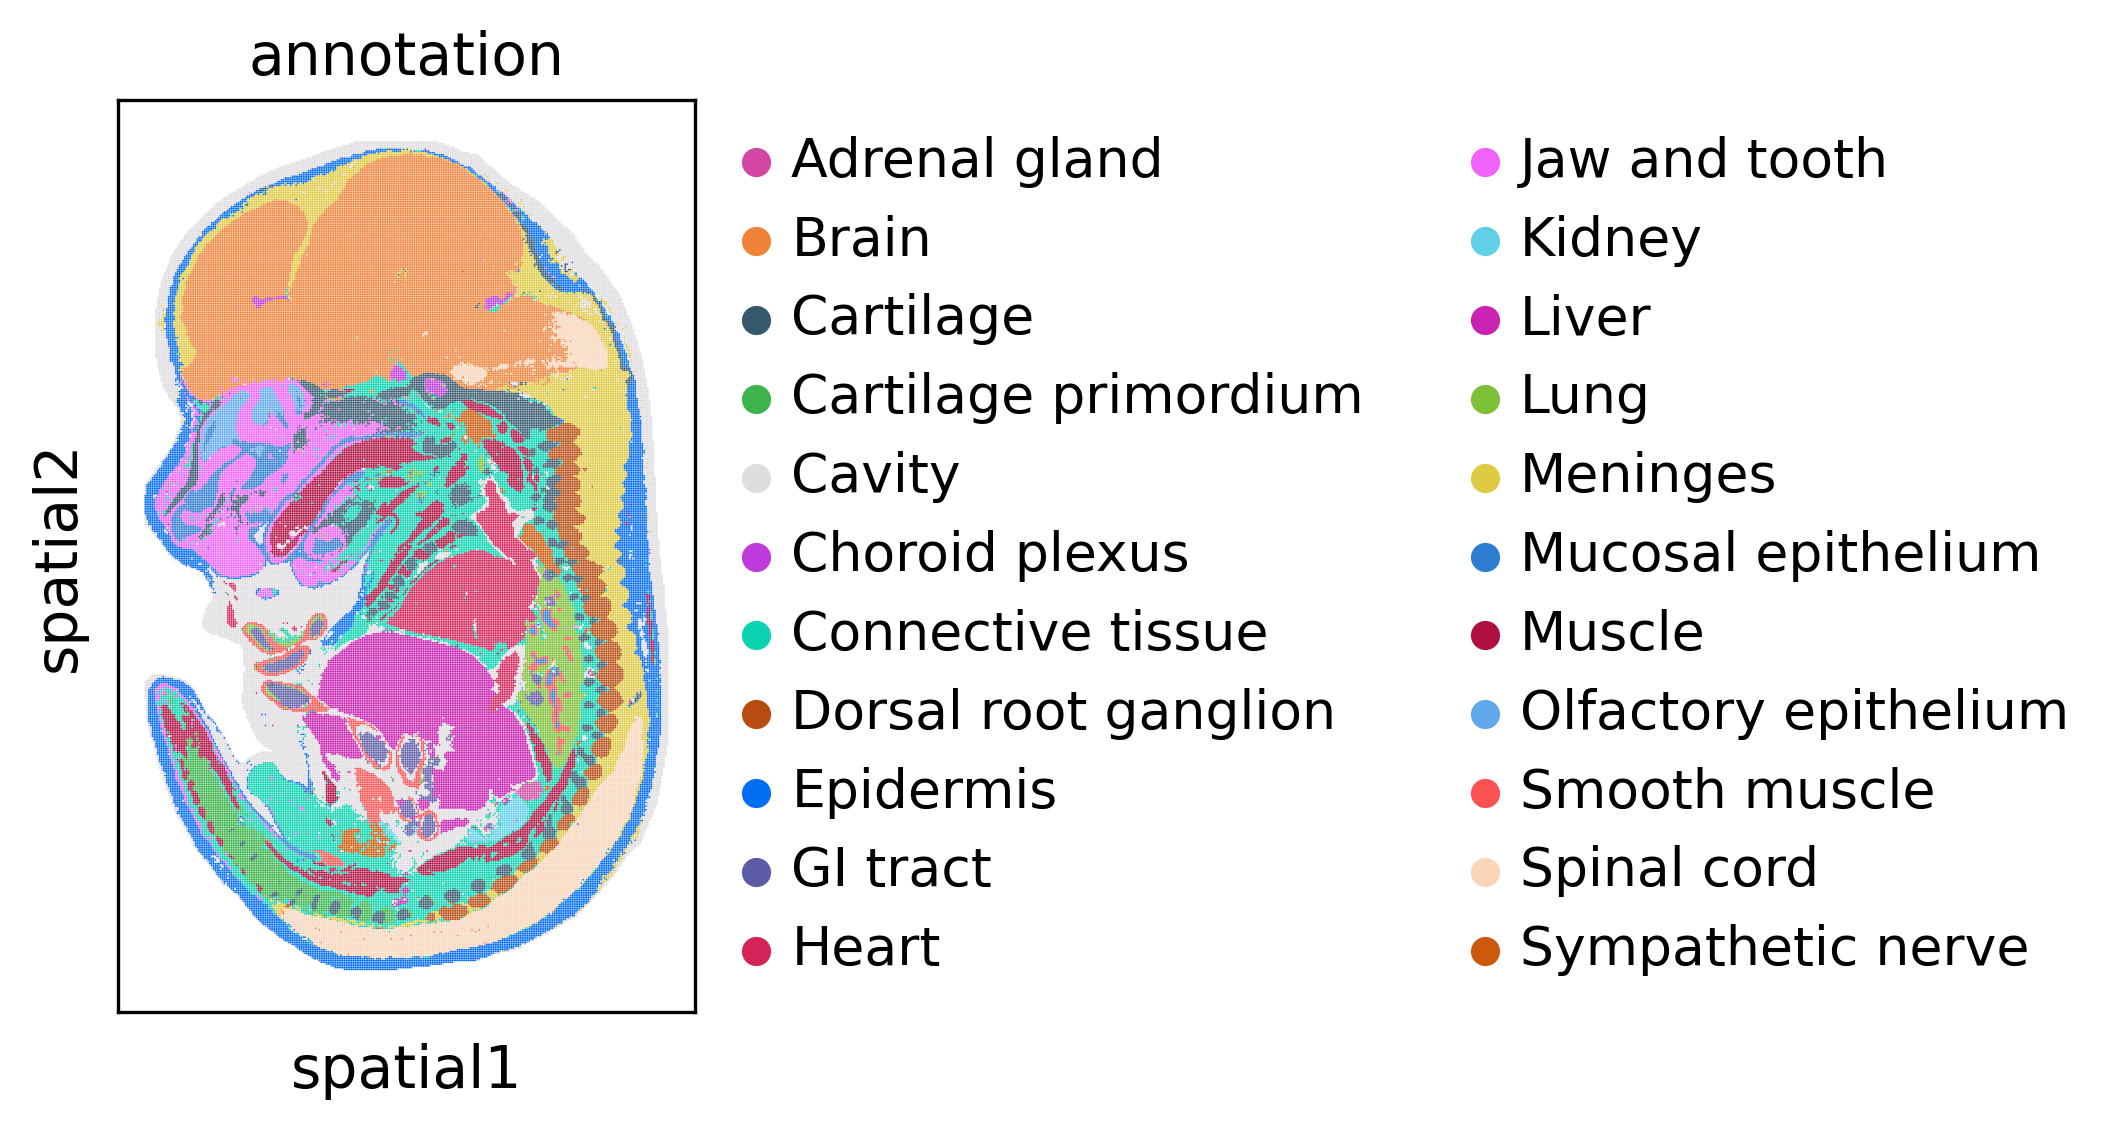

In [5]:
sc.pl.spatial(adata1, spot_size=1, color='annotation')
sc.pl.spatial(adata2, spot_size=1, color='annotation')
sc.pl.spatial(adata3, spot_size=1, color='annotation')
sc.pl.spatial(adata4, spot_size=1, color='annotation')

# run SLAT on multiple datasets

In [6]:
matching_list,zip_res = run_SLAT_multi([adata1,adata2,adata3,adata4])

Calculating spatial neighbor graph ...
The graph contains 1060221 edges, 104845 cells.
10.112270494539558 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 1158020 edges, 113350 cells.
10.2163211292457 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 1053612 edges, 104042 cells.
10.126794948193998 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 1106729 edges, 109811 cells.
10.078489404522315 neighbors per cell on average.
Parallel mapping dataset:1 --- dataset:2
Parallel mapping dataset:2 --- dataset:3
Parallel mapping dataset:0 --- dataset:1
Use DPCA feature to format graph


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


Use DPCA feature to format graph
Use DPCA feature to format graph


/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received

Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Warning! Dual PCA is using GPU, which may lead to OUT OF GPU MEMORY in big dataset!
Choose GPU:3 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 8.39
Choose GPU:4 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 8.13
Choose GPU:5 as device
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 8.28


Mapping 0th layer 
Mapping 1th layer 
Mapping 2th layer 


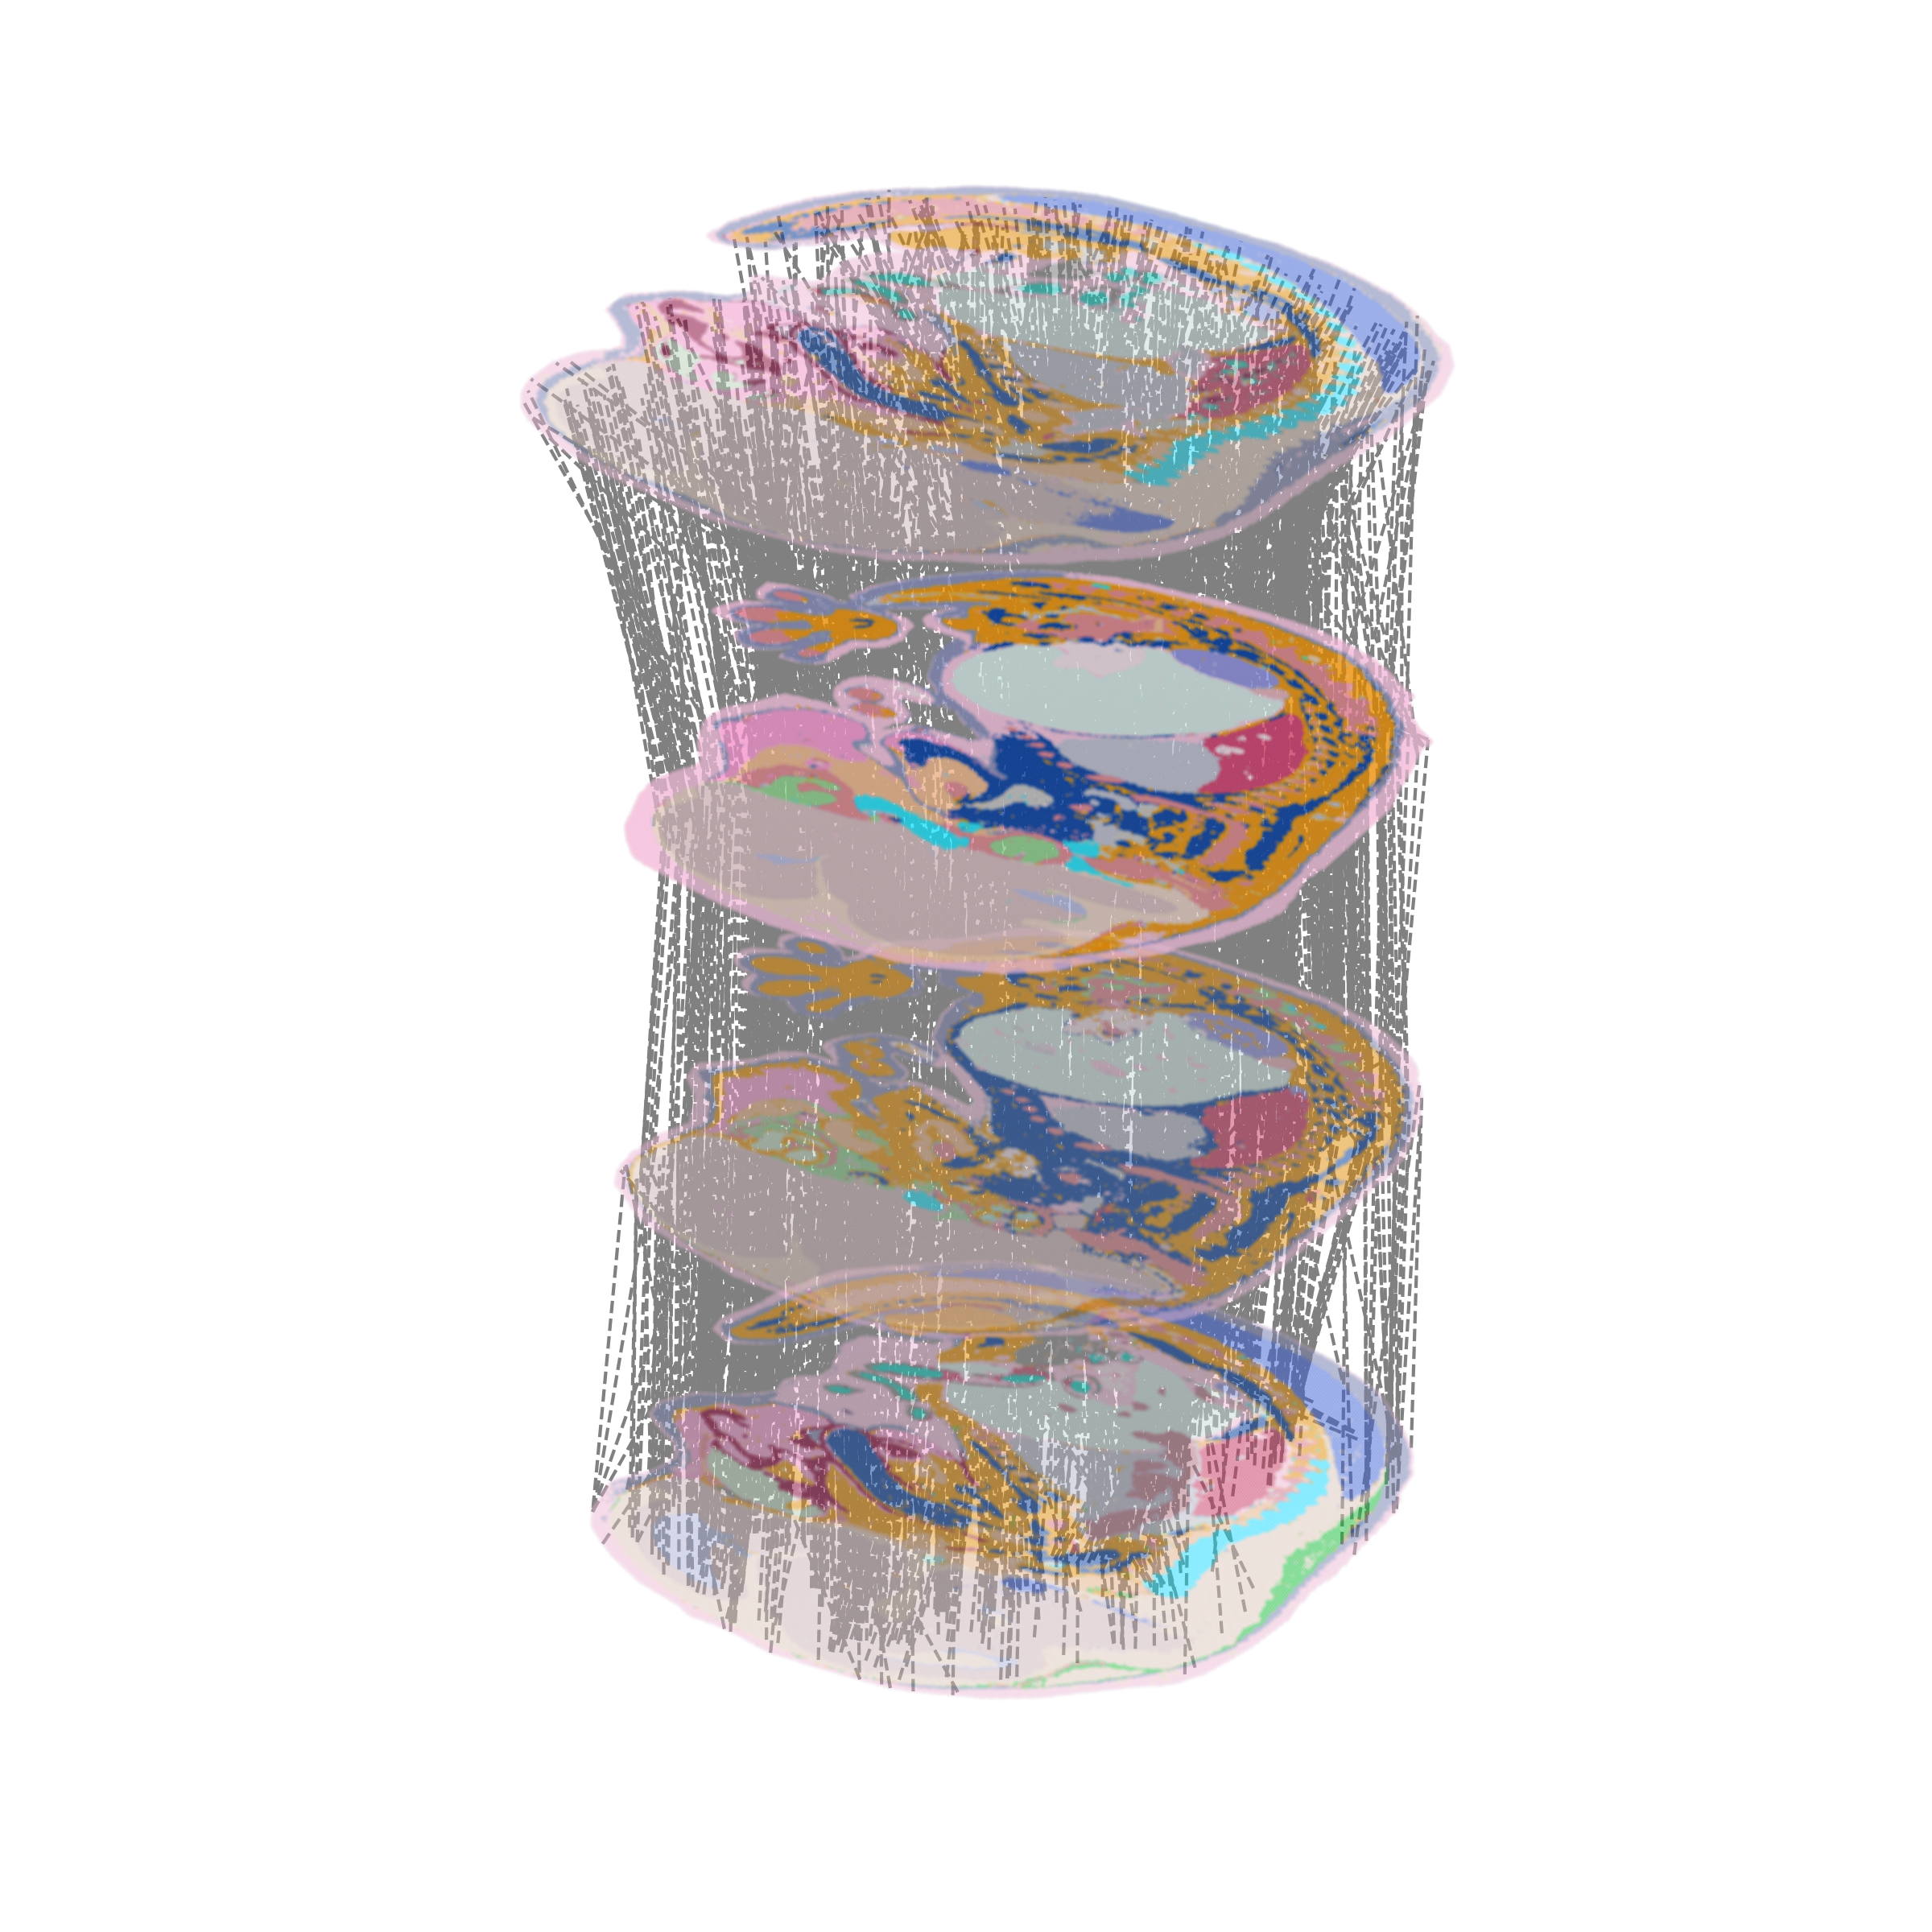

In [15]:
model = build_3D([adata1,adata2,adata3,adata4], matching_list, subsample_size=1000)
model.draw_3D(hide_axis=True, line_color='grey', height=10, size=[10,20], line_width=1, line_alpha=1, point_alpha=0.05)